In [ ]:
!pip install sounddevice

In [ ]:
!apt-get install -y portaudio19-dev
!pip install soundfile simpleaudio
!pip install librosa scipy
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import simpleaudio as sa

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libasound2-dev libjack-dev libjack0 libportaudio2 libportaudiocpp0
Suggested packages:
  libasound2-doc jackd1 portaudio19-doc
The following packages will be REMOVED:
  libjack-jackd2-0
The following NEW packages will be installed:
  libasound2-dev libjack-dev libjack0 libportaudio2 libportaudiocpp0
  portaudio19-dev
0 upgraded, 6 newly installed, 1 to remove and 1 not upgraded.
Need to get 596 kB of archives.
After this operation, 3,178 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libjack0 amd64 1:0.125.0-3build2 [93.3 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libasound2-dev amd64 1.2.6.1-1ubuntu1 [110 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libjack-dev amd64 1:0.125.0-3build2 [206 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe

In [ ]:
from IPython.display import Audio
import soundfile as sf

data, samplerate = sf.read("/content/drive/MyDrive/LJ037-0171.wav")

Audio(data, rate=samplerate)

In [ ]:
import soundfile as sf

data, fs = sf.read("/content/drive/MyDrive/self_recorded.wav")
info = sf.info("/content/drive/MyDrive/self_recorded.wav")

print("Sampling Rate:", fs)
print("Bit Depth:", info.subtype)

Sampling Rate: 44100
Bit Depth: PCM_16


In [ ]:
import soundfile as sf

data, fs = sf.read("/content/drive/MyDrive/LJ037-0171.wav")
info = sf.info("/content/drive/MyDrive/LJ037-0171.wav")

print("Sampling Rate:", fs)
print("Bit Depth:", info.subtype)

Sampling Rate: 22050
Bit Depth: PCM_16


Sample Rate (Hz): 22050
Total Samples: 167226
Total Duration (seconds): 7.583945578231292


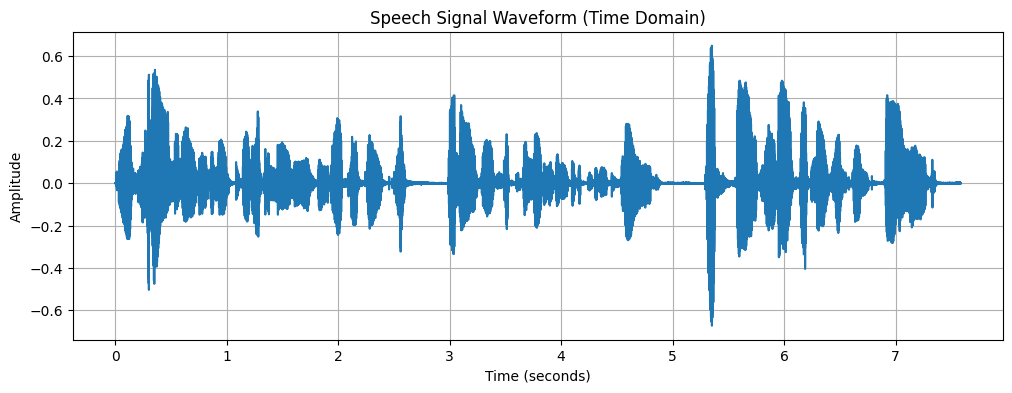

Active Speech Duration (seconds): 1.636281179138322


In [ ]:
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt

signal, fs = sf.read("/content/drive/MyDrive/LJ037-0171.wav")

if signal.ndim > 1:
    signal = signal.mean(axis=1)

num_samples = len(signal)
total_duration = num_samples / fs

print("Sample Rate (Hz):", fs)
print("Total Samples:", num_samples)
print("Total Duration (seconds):", total_duration)

time = np.arange(num_samples) / fs

plt.figure(figsize=(12, 4))
plt.plot(time, signal)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Speech Signal Waveform (Time Domain)")
plt.grid(True)
plt.show()

frame_size = int(0.02 * fs)
hop_size = int(0.01 * fs)

energy = []
for i in range(0, num_samples - frame_size, hop_size):
    frame = signal[i:i + frame_size]
    energy.append(np.sum(frame ** 2))

energy = np.array(energy)

threshold = 0.1 * np.max(energy)

active_frames = energy > threshold
active_duration = np.sum(active_frames) * (hop_size / fs)

print("Active Speech Duration (seconds):", active_duration)


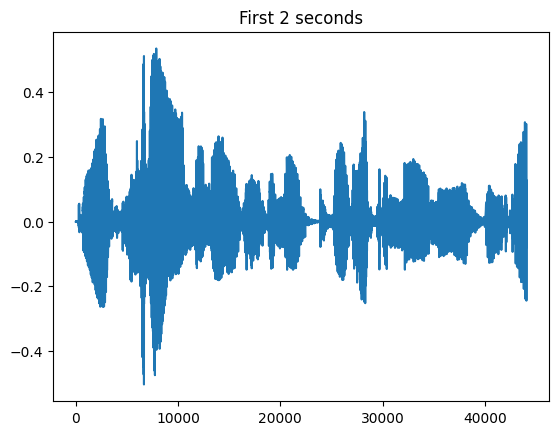

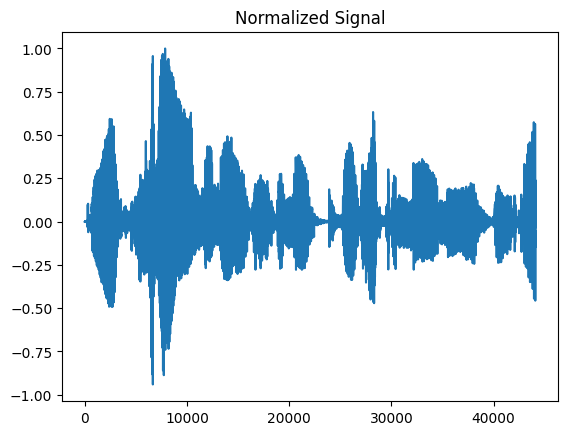

In [ ]:
slice_signal = signal[:2*fs]

plt.plot(slice_signal)
plt.title("First 2 seconds")
plt.show()

normalized = slice_signal / np.max(np.abs(slice_signal))

plt.plot(normalized)
plt.title("Normalized Signal")
plt.show()

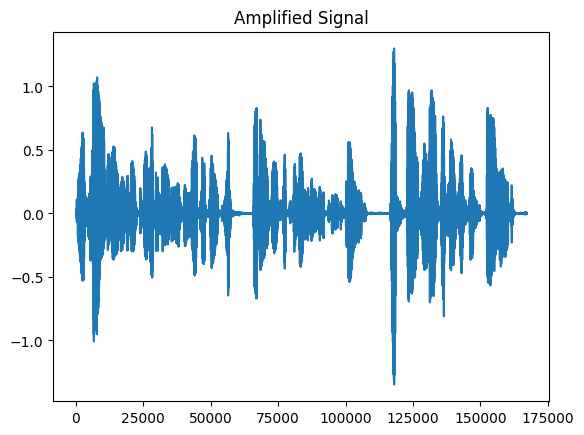

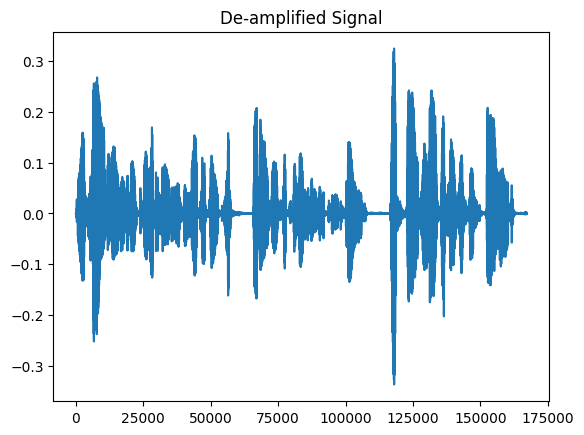

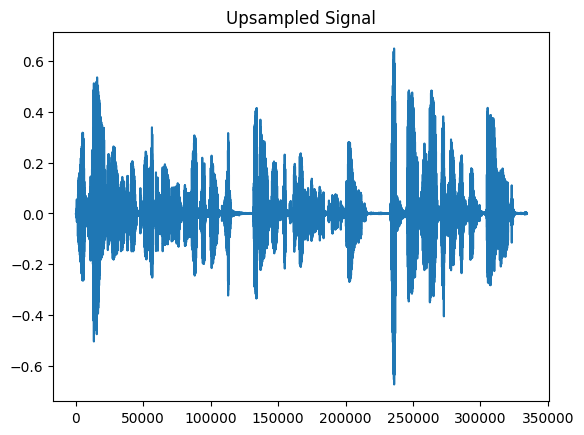

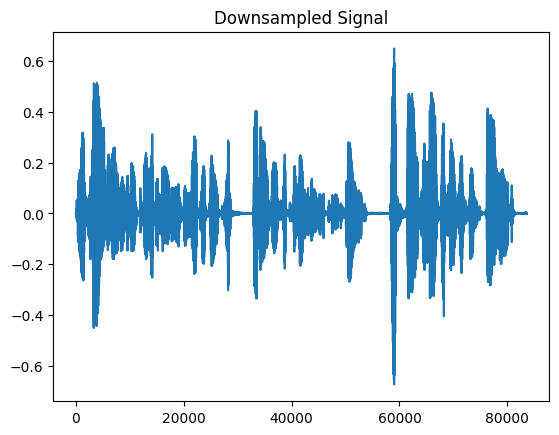

In [ ]:
amplified = signal * 2
deamplified = signal * 0.5

plt.plot(amplified)
plt.title("Amplified Signal")
plt.show()

plt.plot(deamplified)
plt.title("De-amplified Signal")
plt.show()

upsampled = np.repeat(signal, 2)
downsampled = signal[::2]

plt.plot(upsampled)
plt.title("Upsampled Signal")
plt.show()

plt.plot(downsampled)
plt.title("Downsampled Signal")
plt.show()

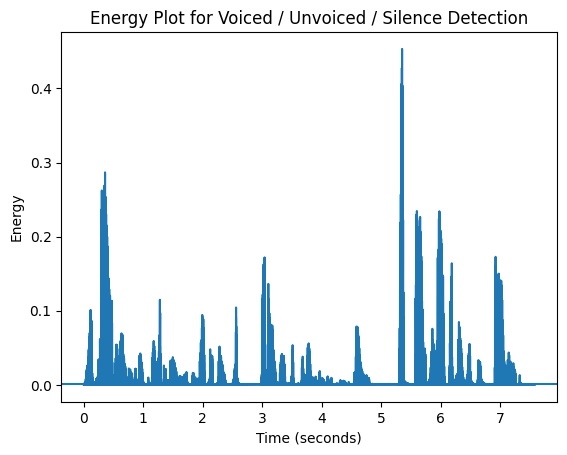

In [ ]:

energy = signal ** 2
threshold = 0.001

plt.figure()
plt.plot(time, energy)
plt.axhline(y=threshold)
plt.xlabel("Time (seconds)")
plt.ylabel("Energy")
plt.title("Energy Plot for Voiced / Unvoiced / Silence Detection")
plt.show()